In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import netCDF4 as nc
from scipy import spatial as spat

import sys
sys.path.append('../')
from src import data
from src import visualization as vis

import os

In [2]:
gomfiles_dir = "../../../gom3_hourly"

dset = nc.Dataset(gomfiles_dir+"/gom3_198003.nc")
H = dset.variables['h'][:].data
T = dset.variables['temp'][0, 0, :].data

Cod: 3:9, 3:9
Haddock: 3:8, 7:13
Flounder: 4:12, 5:9
Mackerel: 5:16, 3:7
Butterfish: 12:19, 5:13

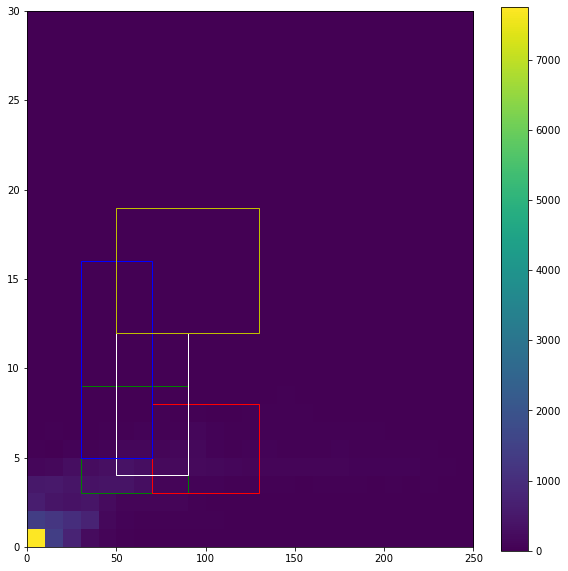

In [18]:
h, xe, ye = np.histogram2d(H, T, range=[[0, 250], [0, 30]], bins=[25, 30])
h=h.T
#h = h/h.sum(axis=0, keepdims=1)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

cod_rect = mpl.patches.Rectangle((30, 3), 60, 6, linewidth=1,edgecolor='g',facecolor='none')
had_rect = mpl.patches.Rectangle((70, 3), 60, 5, linewidth=1,edgecolor='r',facecolor='none')
flo_rect = mpl.patches.Rectangle((50, 4), 40, 8, linewidth=1,edgecolor='w',facecolor='none')
mac_rect = mpl.patches.Rectangle((30, 5), 40, 11, linewidth=1,edgecolor='b',facecolor='none')
but_rect = mpl.patches.Rectangle((50, 12), 80, 7, linewidth=1,edgecolor='y',facecolor='none')

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], aspect=10)

ax.add_patch(cod_rect)
ax.add_patch(had_rect)
ax.add_patch(flo_rect)
ax.add_patch(mac_rect)
ax.add_patch(but_rect)

plt.colorbar(im, ax=ax)

In [27]:
h.sum(axis=1).reshape(-1, 1)

array([[1.0537e+04],
       [5.0890e+03],
       [2.6980e+03],
       [3.7530e+03],
       [3.8260e+03],
       [1.7080e+03],
       [9.9400e+02],
       [4.5600e+02],
       [3.1900e+02],
       [3.5200e+02],
       [2.7600e+02],
       [3.1900e+02],
       [2.2900e+02],
       [6.8000e+01],
       [4.2000e+01],
       [7.3000e+01],
       [4.0000e+00],
       [1.0000e+00],
       [3.0000e+00],
       [2.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00]])

In [38]:
h_new = h/h.sum(axis=0, keepdims=1)

In [44]:
h_new_2 = h_new/h.sum(axis=1).reshape(-1, 1)
#h_new_2[h_new_2 == np.nan] = 0

/vortexfs1/home/jzahner/.conda/envs/larval-dispersal-modeling/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


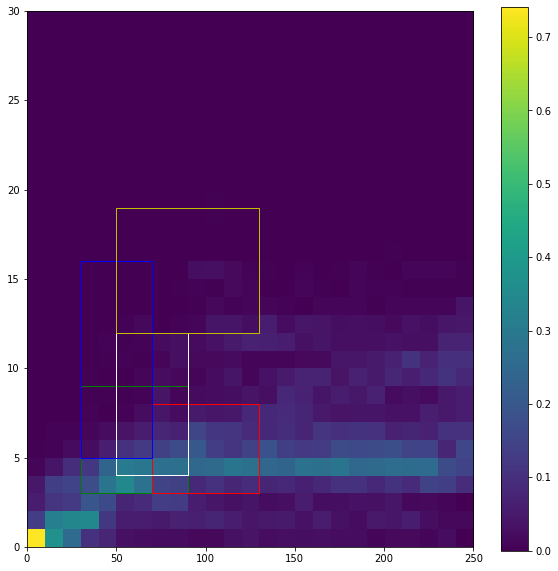

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cod_rect = mpl.patches.Rectangle((30, 3), 60, 6, linewidth=1,edgecolor='g',facecolor='none')
had_rect = mpl.patches.Rectangle((70, 3), 60, 5, linewidth=1,edgecolor='r',facecolor='none')
flo_rect = mpl.patches.Rectangle((50, 4), 40, 8, linewidth=1,edgecolor='w',facecolor='none')
mac_rect = mpl.patches.Rectangle((30, 5), 40, 11, linewidth=1,edgecolor='b',facecolor='none')
but_rect = mpl.patches.Rectangle((50, 12), 80, 7, linewidth=1,edgecolor='y',facecolor='none')

im = ax.imshow(h/h.sum(axis=0), interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], aspect=10)

ax.add_patch(cod_rect)
ax.add_patch(had_rect)
ax.add_patch(flo_rect)
ax.add_patch(mac_rect)
ax.add_patch(but_rect)

plt.colorbar(im, ax=ax)

In [49]:
h_new_2.sum(axis=0)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [280]:
dates = []
temps = []
cod = []
had = []
flo = []
mac = []
but = []

for y in range(1980, 2017):
    print(y)
    for m in range(1, 13):
        mo = str(m).zfill(2)
        fname = "/gom3_{}{}.nc".format(y, mo)
        dset = nc.Dataset(gomfiles_dir+fname)
        H = dset.variables['h'][:].data
        T = dset.variables['temp'][0, 0, :].data
        
        h, xe, ye = np.histogram2d(H, T, range=[[0, 250], [0, 30]], bins=[25, 30])
        h=h.T
        h = h/h.sum(axis=0, keepdims=1)
        
        dates.append(y+(m/12))
        
        s = np.sum(h)
        
        cod.append(np.sum(h[3:9, 3:9])/s)
        had.append(np.sum(h[3:8, 7:13])/s)
        flo.append(np.sum(h[4:12, 5:9])/s)
        mac.append(np.sum(h[5:16, 3:7])/s)
        but.append(np.sum(h[12:19, 5:13])/s)
        
        temps.append(np.mean(T))

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [286]:
cod = np.mean(np.array(cod).reshape(-1, 12), axis=1)
had = np.mean(np.array(had).reshape(-1, 12), axis=1)
flo = np.mean(np.array(flo).reshape(-1, 12), axis=1)
mac = np.mean(np.array(mac).reshape(-1, 12), axis=1)
but = np.mean(np.array(but).reshape(-1, 12), axis=1)

temps = np.mean(np.array(temps).reshape(-1, 12), axis=1)

ValueError: cannot reshape array of size 37 into shape (12)

In [288]:
dates = list(range(1980, 2017))
dates = np.array(dates)

In [291]:
temps = temps/np.std(temps)

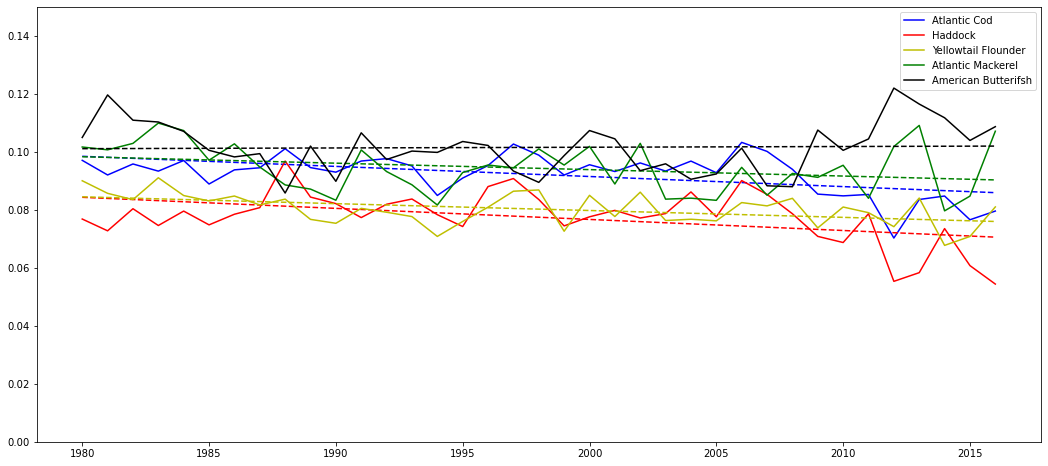

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

ax.plot(dates, cod, "b-", label="Atlantic Cod", )
ax.plot(dates, dates*slope_cod+intercept_cod, "b--")

ax.plot(dates, had, "r-", label="Haddock")
ax.plot(dates, dates*slope_had+intercept_had, "r--")

ax.plot(dates, flo, "y-", label="Yellowtail Flounder")
ax.plot(dates, dates*slope_flo+intercept_flo, "y--")

ax.plot(dates, mac, "g-", label="Atlantic Mackerel")
ax.plot(dates, dates*slope_mac+intercept_mac, "g--")

ax.plot(dates, but, "k-", label="American Butterifsh")
ax.plot(dates, dates*slope_but+intercept_but, "k--")

ax.set_ylim((0, 0.15))

plt.legend()

In [279]:
import scipy.stats as stats

slope_cod, intercept_cod, r_value_cod, p_value_cod, std_err_cod = stats.linregress(dates,cod)
slope_had, intercept_had, r_value_had, p_value_had, std_err_had = stats.linregress(dates,had)
slope_flo, intercept_flo, r_value_flo, p_value_flo, std_err_flo = stats.linregress(dates,flo)
slope_mac, intercept_mac, r_value_mac, p_value_mac, std_err_mac = stats.linregress(dates,mac)
slope_but, intercept_but, r_value_but, p_value_but, std_err_but = stats.linregress(dates,but)

slopes = [slope_cod, slope_had, slope_flo, slope_mac, slope_but]
pvals = [p_value_cod, p_value_had, p_value_flo, p_value_mac, p_value_but]

slopes, pvals

([-0.00034830554699045215,
  -0.0003815376795420906,
  -0.00023641853956684507,
  -0.00022204064333764347,
  2.471585638895918e-05],
 [0.0008140975980901593,
  0.005118636269897507,
  0.003510200621378308,
  0.09020288721558929,
  0.8575019481100382])

In [186]:
np.sum(h[12:19, 5:14])/np.sum(h)

0.18779515416673714

(array([6523., 6049., 3185., 2073., 1760., 1400., 1257., 1048.,  758.,
         660.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.],
       dtype=float32),
 <BarContainer object of 10 artists>)

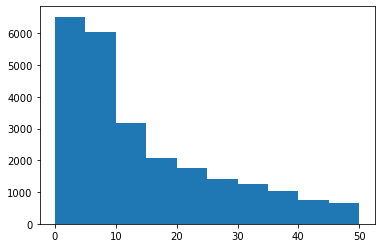

In [103]:
plt.hist(H, range=[0, 50])

(array([  200.,   326.,    97.,  1230.,  1008.,   631.,  1932.,  5718.,
        13190.,  9333.,  1564.,  3397.,  4616.,  3733.,   557.,   211.,
          158.,   123.,    75.,    67.,    59.,    45.,    58.,    94.,
           29.]),
 array([-1.0588107 , -0.13473526,  0.7893402 ,  1.7134156 ,  2.637491  ,
         3.5615666 ,  4.485642  ,  5.4097176 ,  6.3337927 ,  7.2578683 ,
         8.181944  ,  9.106019  , 10.030095  , 10.95417   , 11.878245  ,
        12.802321  , 13.726397  , 14.650472  , 15.574548  , 16.498623  ,
        17.422699  , 18.346773  , 19.27085   , 20.194925  , 21.119     ,
        22.043076  ], dtype=float32),
 <BarContainer object of 25 artists>)

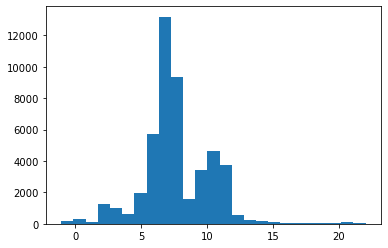

In [99]:
plt.hist(T, bins=25)

In [93]:
np.sum(h.T[:, 30:91])

0.0

In [3]:
def get_datafiles_for_year(basedir, year, fname):
    directory = "{}/Year{}".format(basedir, year)
    dirs = list(os.walk(directory))
    subdirs = dirs[1:]
    file_paths = []
    for i in range(len(subdirs)):
        filename = "{}/{}".format(subdirs[i][0], fname)
        if os.path.exists(filename):
            file_paths.append(filename)

    return file_paths

def get_temp_for_year(basedir, year, fname):
    files = get_datafiles_for_year(basedir, year, fname)
    print(files)
    all_temps = np.zeros(shape=(102, 1)).T

    for f in files:
        d = nc.Dataset(f)

        temps = d.variables['T'][:, :].data.T

        all_temps = np.append(all_temps, temps, axis=0)

        d.close()

    return all_temps

def get_temp_for_all_years(basedir, years, fname):

    all_temps = np.empty(shape=(1,102))

    for y in years:
        temps = get_temp_for_year(basedir, y, fname)
        all_temps = np.append(all_temps, temps, axis=0)

    return all_temps

def get_depth_for_year(basedir, year, fname):
    files = get_datafiles_for_year(basedir, year, fname)
    print(files)
    all_depths = np.zeros(shape=(102, 1)).T

    for f in files:
        d = nc.Dataset(f)

        depths = d.variables['h'][:, :].data.T

        all_depths = np.append(all_depths, depths, axis=0)

        d.close()

    return all_depths

def get_depth_for_all_years(basedir, years, fname):

    all_depths = np.empty(shape=(1,102))

    for y in years:
        depths = get_temp_for_year(basedir, y, fname)
        all_depths = np.append(all_depths, depths, axis=0)

    return all_depths

In [4]:
all_temps = get_temp_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1984, "fiscm_group_001.nc")
all_temps = all_temps[1:, :]

all_depths = get_depth_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1984, "fiscm_group_001.nc")
all_depths = all_depths[1:, :]

['../../model_runs/data/atlantic-cod/baseline_data/Year1984/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/04-apr/fiscm_group_001.nc']
['../../model_runs/data/atlantic-cod/baseline_data/Year1984/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/04-apr/fiscm_group_001.nc']


In [7]:
h, xe, ye = np.histogram2d(all_depths.ravel(), all_temps.ravel(), range=[[0, 250], [0, 30]])

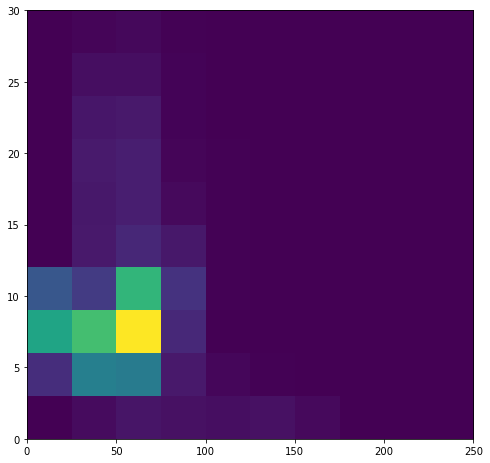

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], aspect=8)

In [ ]:
all_temps = get_temp_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1988, "fiscm_group_001.nc")
all_temps = all_temps[1:, :]

all_depths = get_depth_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1988, "fiscm_group_001.nc")
all_depths = all_depths[1:, :]

['../../model_runs/data/atlantic-cod/baseline_data/Year1988/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/04-apr/fiscm_group_001.nc']
['../../model_runs/data/atlantic-cod/baseline_data/Year1988/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1988/04-apr/fiscm_group_001.nc']
